## Stage 1: Importing dependencies for the project

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from time import time 
from tensorflow.python.keras.callbacks import TensorBoard
import datetime
import os

%matplotlib inline
print("GPU is available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

GPU is available


In [2]:
devices = tf.config.experimental.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(devices[0], True)

In [3]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [4]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

## Stage 2: Dataset preprocessing

### Loading the Cifar10 dataset

In [5]:
#Setting class names for the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
#Loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### Image normalization

In [7]:
X_train = X_train / 255.0 # normalize between zero and one

In [8]:
X_train.shape #(index,dimension, dimension, rgb channel)

(50000, 32, 32, 3)

In [9]:
X_test = X_test / 255.0

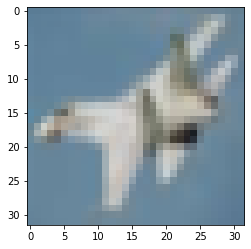

In [10]:
plt.imshow(X_test[10])

## Stage 3: Building a Convolutional neural network

### Defining the model

In [11]:
model = tf.keras.models.Sequential()

### Adding the first CNN Layer

CNN layer hyper-parameters:
- filters: 32
- kernel_size:3x3
- padding: same
- activation: relu
- input_shape: (32, 32, 3)


In [12]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))

### Adding the second CNN Layer and max pool layer

CNN layer hyper-parameters:
- filters: 32
- kernel_size:3x3
- padding: same          `size of output is same as size of input'
- activation: relu

MaxPool layer hyper-parameters:
- pool_size: 2
- strides: 2
- padding: valid  `losing some information, ignoring, if the size of kernal is even and the input is odd`

https://www.pico.net/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow

In [13]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [14]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adding the third CNN Layer

CNN layer hyper-parameters:

    filters: 64
    kernel_size:3x3
    padding: same
    activation: relu
    input_shape: (32, 32, 3)


In [15]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

###  Adding the fourth CNN Layer and max pool layer

CNN layer hyper-parameters:

    filters: 64
    kernel_size:3x3
    padding: same
    activation: relu

MaxPool layer hyper-parameters:

    pool_size: 2
    strides: 2
    padding: valid


In [16]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [17]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adding the Flatten layer

In [18]:
model.add(tf.keras.layers.Flatten())

### Adding the first Dense layer

Dense layer hyper-parameters:
- units/neurons: 128
- activation: relu

In [19]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Adding the second Dense layer (output layer)

Dense layer hyper-parameters:

 - units/neurons: 10 (number of classes)
 - activation: softmax


In [20]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

### Instantiate TensorBoard

In [22]:
log_dir = os.path.join("logs",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

### Compiling the model

#### sparse_categorical_accuracy
sparse_categorical_accuracy checks to see if the maximal true value is equal to the index of the maximal predicted value.

https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy 

In [23]:
# custom_optimizer = tf.keras.optimizers.Adam(learning_rate=.001)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam", metrics=["sparse_categorical_accuracy"])

### Training the model

In [24]:
model.fit(X_train, y_train, epochs=5, callbacks=[tensorboard_callback])

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 14s 278us/sample - loss: 1.3699 - sparse_categorical_accuracy: 0.5041
Epoch 2/5
50000/50000 [==============================] - 11s 227us/sample - loss: 0.9028 - sparse_categorical_accuracy: 0.6825
Epoch 3/5
50000/50000 [==============================] - 12s 241us/sample - loss: 0.7274 - sparse_categorical_accuracy: 0.7476
Epoch 4/5
50000/50000 [==============================] - 13s 253us/sample - loss: 0.6124 - sparse_categorical_accuracy: 0.7852
Epoch 5/5
50000/50000 [==============================] - 13s 256us/sample - loss: 0.5079 - sparse_categorical_accuracy: 0.8220


### Model evaluation and prediction

In [25]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

10000/1 - 1s - loss: 0.5716 - sparse_categorical_accuracy: 0.7421


In [26]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7421000003814697


In [28]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 9444), started 0:02:38 ago. (Use '!kill 9444' to kill it.)